In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [6]:
#iris.data
#iris.target

In [9]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators= 100, criterion = 'entropy')

In [10]:
clf.fit(iris.data, iris.target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [33]:
import numpy as np
def plot_estimator(estimator,X,y):
    x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
    y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
    xx,yy=np.meshgrid(np.arange(x_min,x_max,0.1),np.arange(y_min,y_max,0.1))
    Z=estimator.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    plt.plot()
    plt.contourf(xx,yy,Z,alpha=0.4,cmap=plt.cm.RdYlBu)
    plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.brg)
    plt.xlabel('Petal.Length')
    plt.ylabel('Petal.Width')
    plt.show()

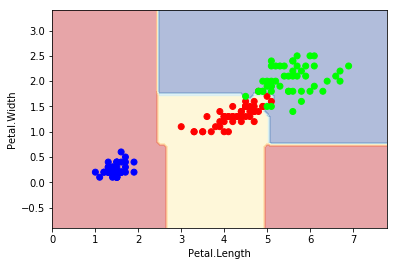

In [38]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
X=iris.data[:,[2,3]]
y=iris.target
clf=RandomForestClassifier(n_estimators=100,criterion="entropy")
clf.fit(X,y)
plot_estimator(clf,X,y)